In [1]:
from pathlib import Path
import obspy
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import csv

In [2]:
key_list_for_plot = ['XA.S16.01.MHZ__19770115T000000Z__19770116T000000Z.mseed_selected_windows.csv',
                     'XA.S16.01.MHZ__19770102T000000Z__19770103T000000Z.mseed_selected_windows.csv',
                     'XA.S14.00.MH1__19730320T000000Z__19730321T000000Z.mseed_selected_windows.csv'
                     ]

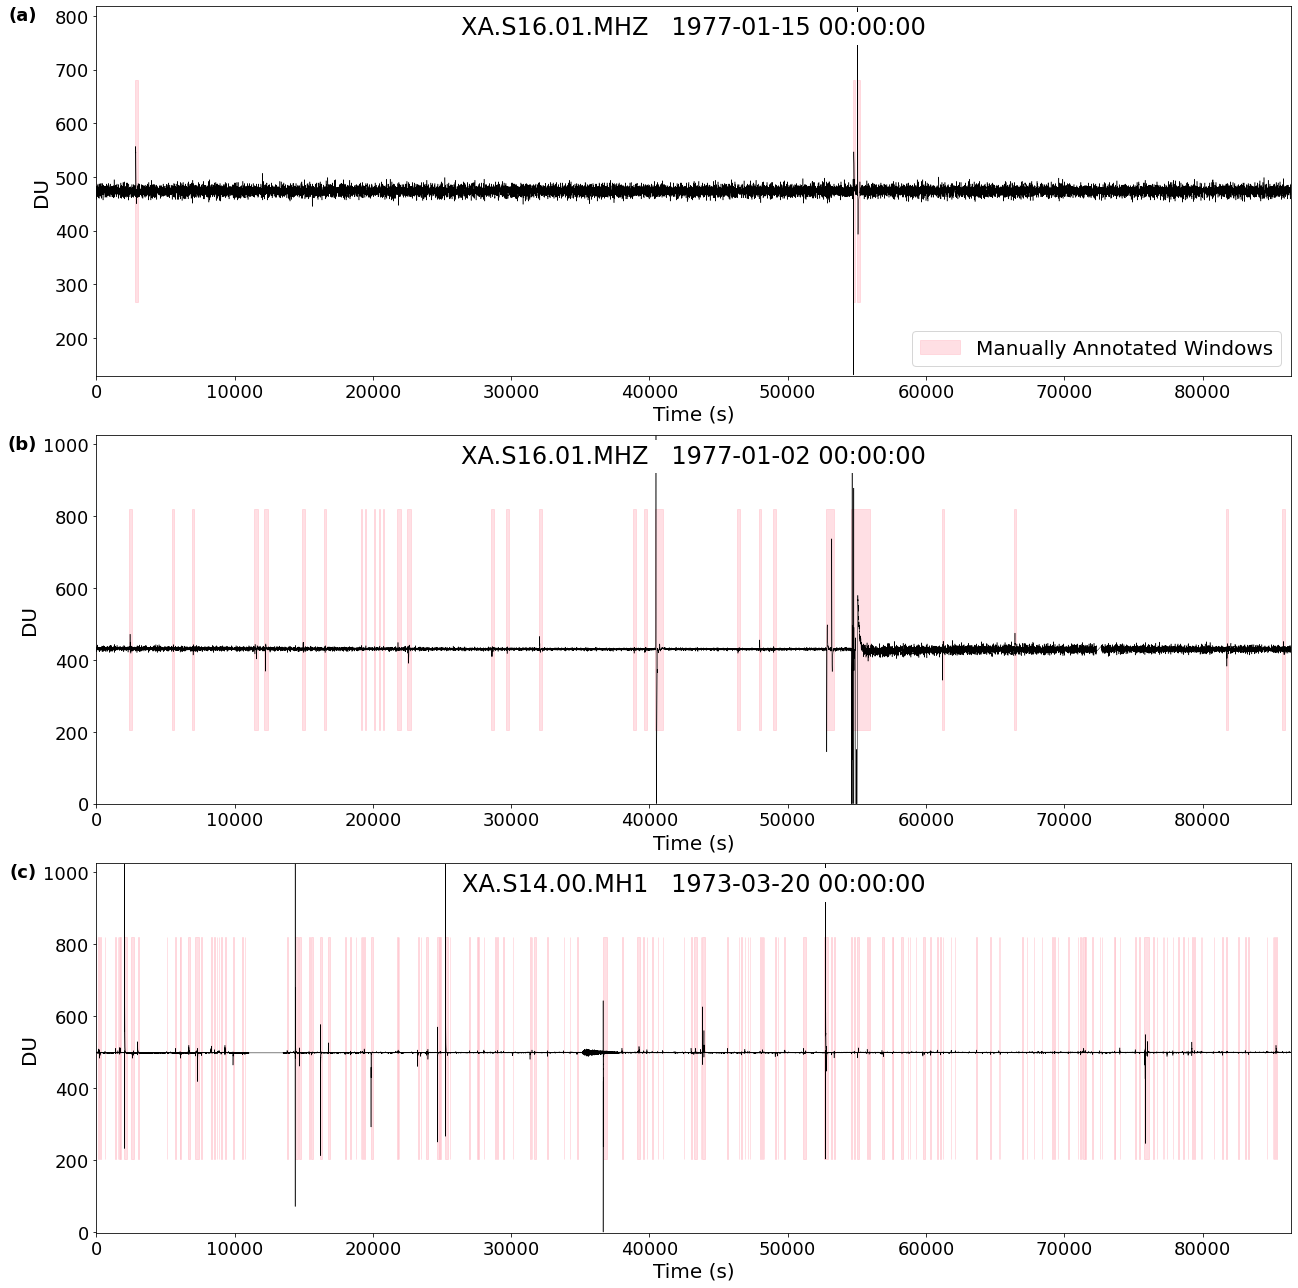

In [10]:
plt.figure(figsize=(18, 18))
for i in range(3):
    plt.subplot(3, 1, i+1)
    if i == 0:
        plt.text(-0.05, 1.0, '(a)', transform=plt.gca().transAxes, fontsize=18, fontweight='bold', va='top', ha='right')
    if i == 1:
        plt.text(-0.05, 1.0, '(b)', transform=plt.gca().transAxes, fontsize=18, fontweight='bold', va='top', ha='right')
    if i == 2:
        plt.text(-0.05, 1.0, '(c)', transform=plt.gca().transAxes, fontsize=18, fontweight='bold', va='top', ha='right')
    key_name = key_list_for_plot[i]
    st = obspy.read(str(key_name.replace('_selected_windows.csv','.mseed')))
    temp_times = st[0].times()
    temp_array = st[0].data
    temp_starttime = st[0].stats.starttime
    temp_windows = []
    with open('./' + str(key_name), 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            temp_windows.append(list(map(obspy.UTCDateTime, row)))
            
    plt.plot(temp_times, temp_array, color='black', linewidth=0.5)
    plt.xlim(0, temp_times[-1])
    #plt.title('{}.{}.{}.{}\n{}-{}'.format(st[0].stats.network, st[0].stats.station, st[0].stats.location, st[0].stats.channel, temp_starttime.strftime('%Y-%m-%d %H:%M:%S'), st[0].stats.endtime.strftime('%Y-%m-%d %H:%M:%S')), fontsize=24)
    plt.text(0.5, 0.975, '{}.{}.{}.{}   {}'.format(st[0].stats.network, st[0].stats.station, st[0].stats.location, st[0].stats.channel,temp_starttime.strftime('%Y-%m-%d %H:%M:%S')), transform=plt.gca().transAxes, 
             fontsize=24, va='top', ha='center', backgroundcolor='white', zorder=10)
    for t_window in temp_windows:
        plt.axvspan(t_window[0] - temp_starttime, t_window[1] - temp_starttime, color='pink', alpha=0.5, ymin=0.2, ymax=0.8)
    plt.axvspan(0, 0, color='pink', alpha=0.5, label='Manually Annotated Windows', ymin=0.2, ymax=0.8)
    if i == 0:
        plt.legend(fontsize=20, loc = 'lower right')
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.ylim(np.min(temp_array) - 2, np.max(temp_array) + 2)
    plt.xlabel('Time (s)', fontsize=20)
    plt.ylabel('DU', fontsize=20)
plt.tight_layout()
plt.savefig('./Figure_3.png', dpi=600)
plt.show()
plt.close()

In [4]:
os.path.exists('./XA.S16.01.MHZ__19770115T000000Z__19770116T000000Z.mseed.mseed')

True

In [5]:
os.path.exists('./XA.S16.01.MHZ__19770115T000000Z__19770116T000000Z.mseed_selected_windows.csv')

True

In [6]:
os.path.exists('XA.S14.00.MH1__19730320T000000Z__19730321T000000Z.mseed_selected_windows.csv')

True